In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd




In [30]:
#read data with modül of pandas 
df = pd.read_csv("C:\DataScience_FinalProject\data\heart.csv")


In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
#split dataset in features and target variable
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_cols].values
y = df.target.values

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [35]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
# Create KNN model and fit it to the standardized training data
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
# Make predictions on the standardized test data
y_pred = knn.predict(X_test_std)


# Evaluating the Model


In [38]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [39]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8609756097560975


In [40]:

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[188  14]
 [ 43 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       202
           1       0.92      0.79      0.85       208

    accuracy                           0.86       410
   macro avg       0.87      0.86      0.86       410
weighted avg       0.87      0.86      0.86       410



Confusion matrix, without normalization
[[91 11]
 [28 75]]
Normalized confusion matrix
[[0.89215686 0.10784314]
 [0.27184466 0.72815534]]


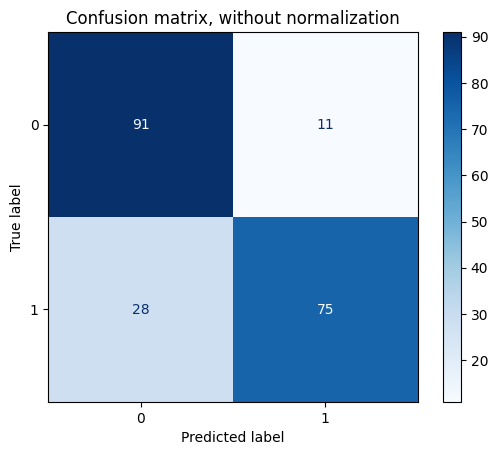

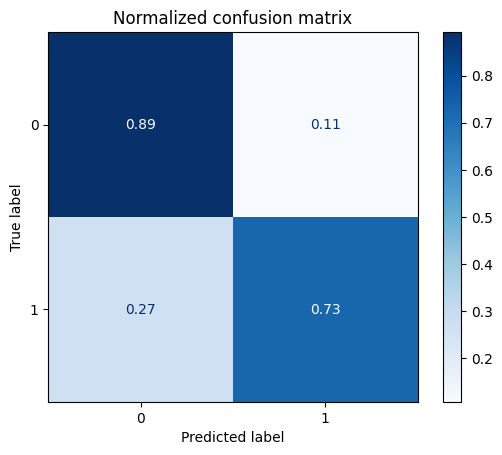

In [41]:
#split dataset in features and target variable
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_cols].values
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier= KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()